# **<u><p style='text-align:center;'> EMAIL SPAM CLASSIFICATION. </p></u>**
<b>Data Description:</b>
1. Spam Messages: These messages are designed to simulate common and uncommon spam patterns, including offers, scams, and urgent notifications. Examples include promotional offers, phishing attempts, and fraudulent claims.
2. Non-Spam Messages: These messages reflect typical professional and personal communications, such as meeting reminders, follow-up emails, and project updates. They include varying formats and contexts to represent realistic, everyday email and SMS content.

Content Patterns:
1. Spam Patterns: Includes phrases such as “Congratulations, you've won a prize!” and “Claim your free gift now!” to simulate various spam scenarios.
2. Non-Spam Patterns: Covers regular communication like “Hi {name}, I hope this message finds you well…” and “Dear {name}, Thank you for reaching out…”
Usage:

This dataset can be used to:
1. Train and test spam detection models using machine learning algorithms.
2. Benchmark different spam classification techniques.
3. Analyze patterns and effectiveness of spam filters in real-world scenarios.
   
File Format: CSV file format with the columns: message_content, is_spam.<br>
<b><u>NOTE:</u></b>      Source dataset from kaggle.

In [2]:
#importing data manipulation libraries.
import pandas as pd
import numpy as np
#importing data visualization library.
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#loading the dataset.
spam_df = pd.read_csv('Datasets/spam_dataset.csv')

# 1. DATA ANALYSIS OVERVIEW.

In [7]:
#displaying the few 5 rows.
spam_df.head()

,message_content,is_spam
0,"Hello Lonnie,\n\nJust wanted to touch base reg...",0
1,"Congratulations, you've won a prize! Call us n...",1
2,You have been pre-approved for a credit card w...,1
3,"Limited time offer, act now! Only a few spots ...",1
4,Your loan has been approved! Transfer funds to...,1


In [9]:
#checking about the data type in each column. No Missing Data: Both columns have 1,000 non-null entries.
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   message_content  1000 non-null   object
 1   is_spam          1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [11]:
#find the size of a DataFrame; the rows and columns ~ [1000 rows x 2 columns].
spam_df.shape

(1000, 2)

In [13]:
#checking for the number of missing values in the dataset.
spam_df.isnull().sum()

message_content    0
is_spam            0
dtype: int64

# 2. DATA CLEANING AND PREPROCESSING.

In [16]:
#spam['is_spam'] = spam['is_spam'].apply(lambda x: 'spam' if x == 1 else 'not spam')
#Make a copy to avoid SettingWithCopyWarning.
spam_df = spam_df.copy()

#Convert the 'is_spam' column to string type and replace values.
spam_df['is_spam'] = spam_df['is_spam'].astype(str).replace({'1': 'spam', '0': 'not spam'})

#Display the result.
print(spam_df['is_spam'].value_counts())

is_spam
not spam    500
spam        500
Name: count, dtype: int64


In [18]:
#count duplicate rows ~ spam_df.duplicated().sum()
#Checking for duplicates.
if spam_df.duplicated().sum() > 0:
#Removing duplicate rows if the dataset has and store in spam for further processing.
    spam = spam_df.drop_duplicates()
    print("Duplicates removed.")
else:
 #If No duplicates found, just rename spam_df to spam for further processing.
    spam = spam_df
    print("No duplicates found.")

Duplicates removed.


In [20]:
#checking the size of a DataFrame after removing the duplicates rows; the rows and columns ~ [677 rows x 2 columns].
spam.shape

(677, 2)

In [22]:
#checking on the cleaning dataset if "is_spam" column data type has change.
spam.dtypes

message_content    object
is_spam            object
dtype: object

In [24]:
#displaying the few 5 rows of the cleaned dataset.
spam.head()

,message_content,is_spam
0,"Hello Lonnie,\n\nJust wanted to touch base reg...",not spam
1,"Congratulations, you've won a prize! Call us n...",spam
2,You have been pre-approved for a credit card w...,spam
3,"Limited time offer, act now! Only a few spots ...",spam
4,Your loan has been approved! Transfer funds to...,spam


In [26]:
#Count the occurrences of  not spam and spam in the 'is_spam' column.
spam_counts = spam['is_spam'].value_counts()

#Display the count.
print(spam_counts)

is_spam
not spam    500
spam        177
Name: count, dtype: int64


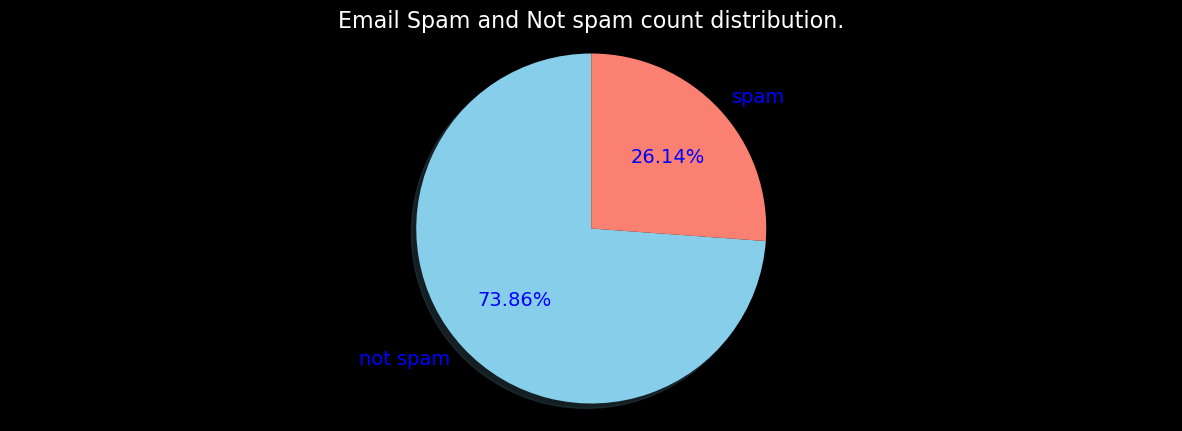

In [28]:
#Defining data to be used in the pie chart ploting.
spam_counts = spam['is_spam'].value_counts()
colors=['skyblue', 'salmon']
labels=['not spam', 'spam']

#Plotting a pie chart.
plt.figure( figsize=(15, 5), 
           facecolor='black' # Set the axis background color to black.
          )
plt.pie(spam_counts, labels=labels, colors=colors, textprops={'color': 'blue','fontsize': 14},autopct='%1.2f%%', startangle=90, shadow=True)

#Setting chart title.
plt.title('Email Spam and Not spam count distribution.',color="white", fontsize="16")

#Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal') 

#Displaying the chart.
plt.show()

<font size="5">Preprocessing of the message_content column. Will involve the following tasks:</font> <br>
<font size="4">1. Text tokenization. </font> <br>
<font size="4">2. Lowercasing of the text. </font> <br>
<font size="4">3. Removing punctation. </font> <br>

In [31]:
#For finding or manipulating specific patterns in strings or searching for particular word patterns. 
import re
#Provides a collection of commonly used words in a language that are often filtered out in text processing such as "is," "the," "and," etc. 
from nltk.corpus import stopwords
#Splits a sentence or text into individual words, a process known as tokenization. 
from nltk.tokenize import word_tokenize

#Download NLTK(Natural Language Toolkit) stopwords if not already available.
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
# Define a preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Join tokens back into a single string
    return ' '.join(tokens)
spam= spam.copy()
# Apply preprocessing to the 'message_content' column
spam['processed_message'] = spam['message_content'].apply(preprocess_text)

# Display a sample of the processed data
spam[['message_content', 'processed_message', 'is_spam']].head()

,message_content,processed_message,is_spam
0,"Hello Lonnie,\n\nJust wanted to touch base reg...",hello lonnie wanted touch base regarding proje...,not spam
1,"Congratulations, you've won a prize! Call us n...",congratulations youve prize call us claim acco...,spam
2,You have been pre-approved for a credit card w...,preapproved credit card high limit special off...,spam
3,"Limited time offer, act now! Only a few spots ...",limited time offer act spots left immediate ac...,spam
4,Your loan has been approved! Transfer funds to...,loan approved transfer funds today hurry oncei...,spam


In [35]:
#Calculating the length of each message can sometimes help in distinguishing spam (often shorter) from non-spam.
# Feature Engineering: Adding message length as a new feature
spam['message_length'] = spam['processed_message'].apply(len)

# Display a sample with the new feature
spam[['message_content', 'processed_message', 'message_length', 'is_spam']].head(50)


,message_content,processed_message,message_length,is_spam
0,"Hello Lonnie,\n\nJust wanted to touch base reg...",hello lonnie wanted touch base regarding proje...,297,not spam
1,"Congratulations, you've won a prize! Call us n...",congratulations youve prize call us claim acco...,127,spam
2,You have been pre-approved for a credit card w...,preapproved credit card high limit special off...,137,spam
3,"Limited time offer, act now! Only a few spots ...",limited time offer act spots left immediate ac...,141,spam
4,Your loan has been approved! Transfer funds to...,loan approved transfer funds today hurry oncei...,129,spam
5,You have been selected to receive a special of...,selected receive special offer act fast dont m...,131,spam
6,"Hello Christian,\n\nJust wanted to touch base ...",hello christian wanted touch base regarding pr...,368,not spam
7,"Dear Bethany,\n\nI hope you’re doing well. I j...",dear bethany hope youre well wanted update pro...,356,not spam
8,"Free vacation, no strings attached! Book now a...",free vacation strings attached book enjoy acco...,127,spam
9,Claim your free gift now! Limited time offer.\...,claim free gift limited time offer get instant...,134,spam


# 3. MODEL SELECTION AND BUILDING.
Train and test spam detection models using machine learning algorithms.
 + The features are processed_message and message_length and target variable is_spam. 
 + processed_message is a text feature, is needed to be converted it to a numerical format using <b>TF-IDF vectorization </b>before combining it with message_length for training.
   

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

#TF-IDF Vectorization of 'processed_message'.
tfidf = TfidfVectorizer(max_features=500)  #Limit features for simplicity.
X_tfidf = tfidf.fit_transform(spam['processed_message']).toarray()

#Create a DataFrame for TF-IDF features and combine with 'message_length'.
tfidf_df = pd.DataFrame(X_tfidf, columns=tfidf.get_feature_names_out())
tfidf_df['message_length'] = spam['message_length'].reset_index(drop=True)  # Include 'message_length' in X.

#Define my X that is features and y that is target variable.
X = tfidf_df
y = spam['is_spam'].apply(lambda x: 1 if x == 'spam' else 0)  #Convert labels to binary.

In [40]:
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

#Define a function to train and evaluate models.
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Model: {model.__class__.__name__}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    
#Model 1: Train and evaluate Naive Bayes.
nb_model = MultinomialNB()
train_and_evaluate_model(nb_model, X_train, y_train, X_test, y_test)

#Model 2: Train and evaluate Support Vector Machine.
svm_model = SVC(kernel='linear', random_state=42)
train_and_evaluate_model(svm_model, X_train, y_train, X_test, y_test)

#Model 3: Train and evaluate Random Forest
rfc_model = RandomForestClassifier(random_state=42)
train_and_evaluate_model(rfc_model, X_train, y_train, X_test, y_test)

Model: MultinomialNB
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        42

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136

--------------------------------------------------
Model: SVC
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        42

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136

--------------------------------------------------
Model: RandomForestClassifier
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0    

<font size= 4><u><b>**Obervations** : </b></u></font><br> 
+ All three models: Naive Bayes, SVM and Random Forest chieved perfect scores across all metrics that is; accuracy, precision, recall and F1 score. This implies that the models are effectively distinguishing between spam and non-spam messages in this dataset.
+ The 100% performance across models may indicate that the dataset is relatively straightforward or homogeneous with easily distinguishable patterns between spam and non-spam messages.

# 4. VERIFY MODELS ROBUSTNESS.
Doing some additional testing on the following:
  + Cross-Validation: using 5-fold cross-validation on the dataset to check if the performance remains consistent across multiple subsets.
  + External Validation Set: set aside a portion of data as an additional validation set separate from the training and testing data.
  + Do testing with Noisy Data: To simulate real-world noise, added random characters or symbols into the text messages and observed how well the models perform.

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Vectorization for all data
tfidf = TfidfVectorizer(max_features=500)
X_tfidf = tfidf.fit_transform(spam['processed_message']).toarray()
tfidf_df = pd.DataFrame(X_tfidf, columns=tfidf.get_feature_names_out())
tfidf_df['message_length'] = spam['message_length'].reset_index(drop=True)

# Target encoding
y = spam['is_spam'].apply(lambda x: 1 if x == 'spam' else 0)

In [48]:
from sklearn.model_selection import train_test_split
# Train/Test split with extra validation set
X_temp, X_val, y_temp, y_val = train_test_split(tfidf_df, y, test_size=0.2, random_state=42)  # External validation set
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # Train and test sets

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

#Define the models.
nb_model = MultinomialNB()
svm_model = SVC(kernel='linear', random_state=42)
rfc_model = RandomForestClassifier(random_state=42)

#Function to evaluate with cross-validation, validation, and noisy data.
def evaluate_models(model, X_train, y_train, X_test, y_test, X_val, y_val):
    
    #Cross-Validation.
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Model: {model.__class__.__name__} - Cross-Validation Accuracy: {np.mean(cv_scores)}")

    #Training and Testing.
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Classification Report (Test Set):")
    print(classification_report(y_test, y_pred))

    #External Validation Set.
    y_val_pred = model.predict(X_val)
    print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred)}")
    print("Classification Report (Validation Set):")
    print(classification_report(y_val, y_val_pred))
    
    #Noisy data Testing,
    def add_noise(texts, noise_factor=0.1):
        noisy_texts = []
        for text in texts:
            noise = ''.join(np.random.choice(['#', '%', '@', '*'], int(len(text) * noise_factor)))
            noisy_text = ''.join(np.random.choice([ch, noise], p=[1 - noise_factor, noise_factor]) for ch in text)
            noisy_texts.append(noisy_text)
        return noisy_texts

    #Generate noisy text data for the test set.
    test_indices = y_test.index  #using `y_test` index to match `spam` DataFrame rows.
    X_test_texts_noisy = add_noise(spam.loc[test_indices, 'processed_message'].values)
    X_noisy_texts = tfidf.transform(X_test_texts_noisy).toarray()
    
    #Adding `message_length` to X_noisy to match train feature count.
    X_noisy = np.hstack((X_noisy_texts, X_test['message_length'].values.reshape(-1, 1)))
    
    #Converting X_noisy to DataFrame with correct feature names.
    X_noisy_df = pd.DataFrame(X_noisy, columns=X_train.columns)
    
    #Prediction on noisy data.
    y_noisy_pred = model.predict(X_noisy_df)
    print(f"Noisy Data Accuracy: {accuracy_score(y_test, y_noisy_pred)}")
    print("Classification Report (Noisy Data):")
    print(classification_report(y_test, y_noisy_pred))
    print("-" * 50)
    
#Evaluation of  each model.
print("Evaluating Naive Bayes Model")
evaluate_models(nb_model, X_train, y_train, X_test, y_test, X_val, y_val)

print("Evaluating SVM Model")
evaluate_models(svm_model, X_train, y_train, X_test, y_test, X_val, y_val)

print("Evaluating Random Forest Classifier Model")
evaluate_models(rfc_model, X_train, y_train, X_test, y_test, X_val, y_val)

Evaluating Naive Bayes Model
Model: MultinomialNB - Cross-Validation Accuracy: 1.0
Test Accuracy: 1.0
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00        39

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136

Validation Accuracy: 1.0
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        42

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136

Noisy Data Accuracy: 0.9852941176470589
Classification Report (Noisy Data):
              precision    recall  f1-score   support

           0  